In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('customer_churn_data.csv')

In [5]:
x = df[['Age', 'Gender', 'Tenure', 'MonthlyCharges']]

In [7]:
y = df['Churn']

In [9]:
x['Gender'] = x['Gender'].apply(lambda g: 1 if g == 'Female' else 0)   

In [11]:
from imblearn.over_sampling import SMOTE

In [13]:
smote = SMOTE(random_state=42)
x, y = smote.fit_resample(x, y)

In [15]:
y = y.apply(lambda c: 1 if c == 'Yes' else 0)

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [21]:
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [25]:
def report(y_test, y_pred):
    print("Accuracy:", accuracy_score(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')   
    plt.title('Confusion Matrix')
    plt.show()
    print("Classification Report:\n", classification_report(y_test, y_pred))

In [27]:
from sklearn.model_selection import GridSearchCV

In [29]:
from sklearn.linear_model import LogisticRegression

In [31]:
log_reg = LogisticRegression(solver='liblinear')

In [33]:
log_reg.fit(x_train_scaled, y_train)

LogisticRegression(solver='liblinear')

Accuracy: 0.7429378531073446


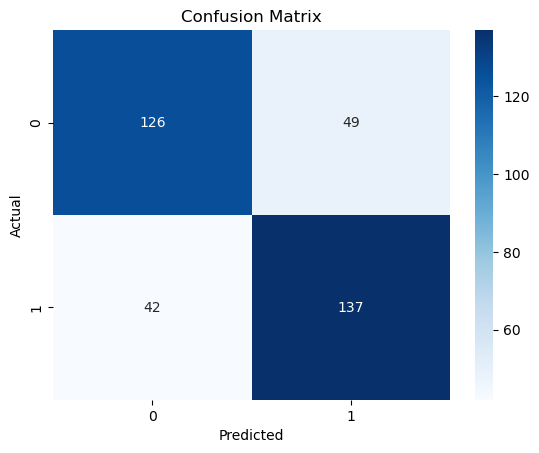

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.72      0.73       175
           1       0.74      0.77      0.75       179

    accuracy                           0.74       354
   macro avg       0.74      0.74      0.74       354
weighted avg       0.74      0.74      0.74       354



In [35]:
y_pred = log_reg.predict(x_test_scaled)
report(y_test, y_pred)

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
params = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [41]:
grid_knn = GridSearchCV(KNeighborsClassifier(), params, cv=5, scoring='recall')
grid_knn.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='recall')

Accuracy: 0.8785310734463276


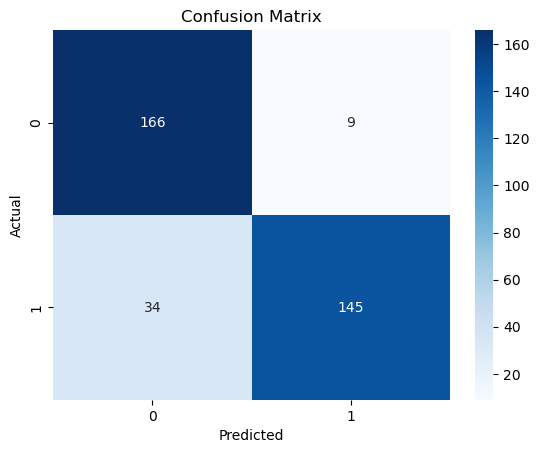

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.95      0.89       175
           1       0.94      0.81      0.87       179

    accuracy                           0.88       354
   macro avg       0.89      0.88      0.88       354
weighted avg       0.89      0.88      0.88       354



In [42]:
y_pred = grid_knn.predict(x_test_scaled)
report(y_test, y_pred)

In [43]:
from sklearn.svm import SVC

In [44]:
params_svc = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

In [46]:
grid_svc = GridSearchCV(SVC(), params_svc, cv=5, scoring='recall')
grid_svc.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='recall')

Accuracy: 0.8531073446327684


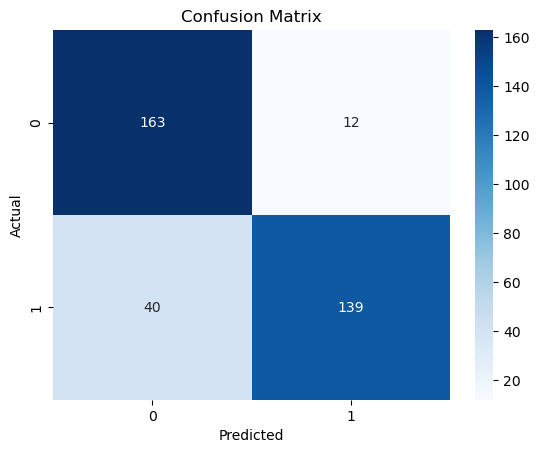

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.93      0.86       175
           1       0.92      0.78      0.84       179

    accuracy                           0.85       354
   macro avg       0.86      0.85      0.85       354
weighted avg       0.86      0.85      0.85       354



In [50]:
y_pred = grid_svc.predict(x_test_scaled)
report(y_test, y_pred)

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
param_dtc = {
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [10, 20, 30],
    'min_samples_leaf': [4, 7, 10],
    'splitter': ['best', 'random']
}
    

In [53]:
grid_dtc = GridSearchCV(DecisionTreeClassifier(), param_dtc, cv=5, scoring='recall')
grid_dtc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [4, 7, 10],
                         'min_samples_split': [10, 20, 30],
                         'splitter': ['best', 'random']},
             scoring='recall')

In [54]:
grid_dtc.best_params_

{'criterion': 'entropy',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'splitter': 'best'}

Accuracy: 0.8587570621468926


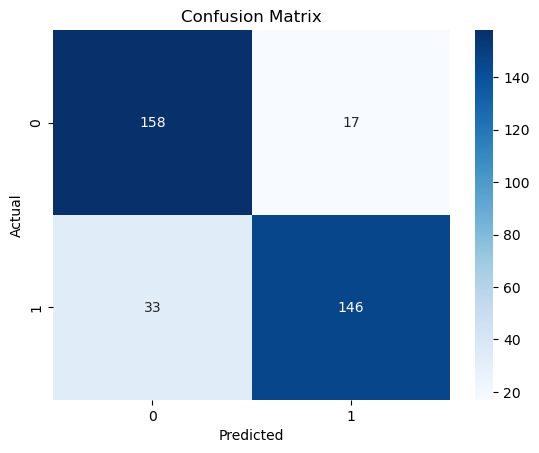

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86       175
           1       0.90      0.82      0.85       179

    accuracy                           0.86       354
   macro avg       0.86      0.86      0.86       354
weighted avg       0.86      0.86      0.86       354



In [61]:
y_pred = grid_dtc.predict(x_test)
report(y_test, y_pred)

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
params_rfc = {
    'n_estimators': [50, 40, 60],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

In [67]:
grid_rfc = GridSearchCV(RandomForestClassifier(), params_rfc, cv=5, scoring='accuracy')
grid_rfc.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'n_estimators': [50, 40, 60]},
             scoring='accuracy')

In [68]:
grid_rfc.best_params_

{'bootstrap': False, 'criterion': 'entropy', 'n_estimators': 60}

Accuracy: 0.903954802259887


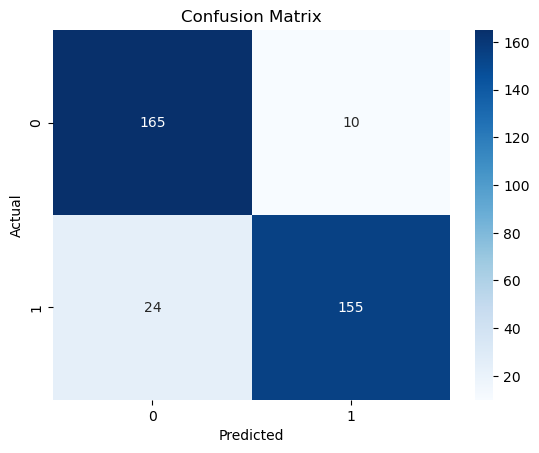

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.91       175
           1       0.94      0.87      0.90       179

    accuracy                           0.90       354
   macro avg       0.91      0.90      0.90       354
weighted avg       0.91      0.90      0.90       354



In [69]:
y_pred = grid_rfc.predict(x_test_scaled)
report(y_test, y_pred)

In [73]:
best_model = grid_rfc.best_estimator_

In [75]:
joblib.dump(best_model, 'model.pkl')

['model.pkl']